[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

# Mnist Logistic Regression

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 20/03/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0041LogisticRegressionSolution.ipynb)

In [1]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import fetch_openml
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Image Processing

# Machine Learning

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Set, Tuple, Union

# Visualization
import matplotlib as mpl
from matplotlib.colors import LogNorm, Normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [2]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [3]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2

In [4]:
# Courses Packages
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotLabelsHistogram, PlotMnistImages

In [5]:
# General Auxiliary Functions


## Logistic Regression

In this exercise we'll use the Logistic Regression model as a classifier.  
The SciKit Learn library implement it with the [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class.

I this exercise we'll do the following:

1. Load the [MNIST Data set](https://en.wikipedia.org/wiki/MNIST_database) using `fetch_openml()`.
2. Train a Logistic Regression model on the training data.
3. Optimize the parameters: `penalty` and `C` by the `roc_auc` score.
4. Interpret the model using its weights.

* <font color='brown'>(**#**)</font> The model is a linear model, hence its weights are easy to interpret.

In [6]:
# Parameters

numSamplesTrain = 1_500
numSamplesTest  = 1_000

numImg = 3




## Generate / Load Data

Loading the _MNIST_ data set using SciKit Learn.


In [7]:
# Generate Data 

mX, vY = fetch_openml('mnist_784', version = 1, return_X_y = True, as_frame = False, parser = 'auto')
vY = vY.astype(np.int_) #<! The labels are strings, convert to integer

print(f'The features data shape: {mX.shape}')
print(f'The labels data shape: {vY.shape}')
print(f'The unique values of the labels: {np.unique(vY)}')

The features data shape: (70000, 784)
The labels data shape: (70000,)
The unique values of the labels: [0 1 2 3 4 5 6 7 8 9]


In [8]:
# Pre Processing

# The image is in the range {0, 1, ..., 255}
# We scale it into [0, 1]

#===========================Fill This===========================#
# 1. Scale the values into the [0, 1] range.
mX = mX/255

#===============================================================#

In [9]:
numSamplesTrain

1500

In [10]:
# Train Test Split

#===========================Fill This===========================#
# 1. Split the data such that the Train Data has `numSamplesTrain`.
# 2. Split the data such that the Test Data has `numSamplesTest`.
# 3. The distribution of the classes must match the original data.

mXTrain, mXTest, vYTrain, vYTest = train_test_split(mX, vY, test_size=numSamplesTest,train_size=numSamplesTrain, random_state=42)

#===============================================================#

print(f'The training features data shape: {mXTrain.shape}')
print(f'The training labels data shape: {vYTrain.shape}')
print(f'The test features data shape: {mXTest.shape}')
print(f'The test labels data shape: {vYTest.shape}')
print(f'The unique values of the labels: {np.unique(vY)}')

The training features data shape: (1500, 784)
The training labels data shape: (1500,)
The test features data shape: (1000, 784)
The test labels data shape: (1000,)
The unique values of the labels: [0 1 2 3 4 5 6 7 8 9]


### Plot Data

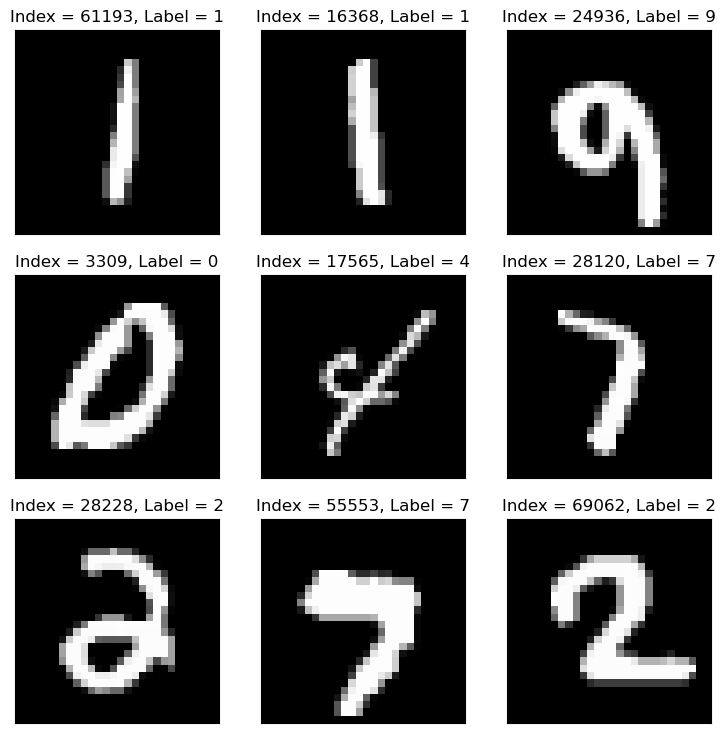

In [11]:
# Plot the Data

hF = PlotMnistImages(mX, vY, numImg)

### Distribution of Labels

When dealing with classification, it is important to know the balance between the labels within the data set.

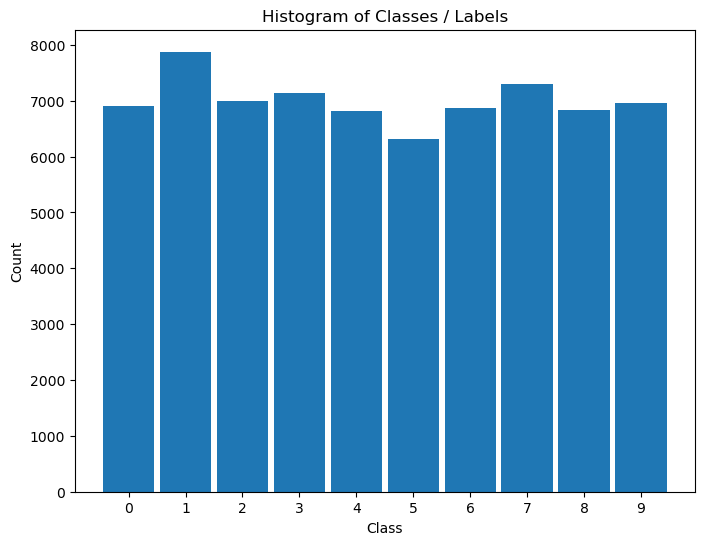

In [12]:
# Distribution of Labels

hA = PlotLabelsHistogram(vY)
plt.show()

### Manual Grid Search Hyper Parameter Optimization

1. Create a data frame with 3 columns:
  - `Penalty` - The value of the `penalty` parameter.
  - `C` - The value of `C` parameter.
  - `ROC AUC` - The value of the `roc_auc()` of the model.
   
   The number of rows should match the number of combinations.

2. Iterate over all combinations and measure the score on the test set.

3. Plot an heatmap (2D) for the combination of hyper parameters and the resulted AUC.

4. Extract the best model.

### sklearn.linear_model.LogisticRegression

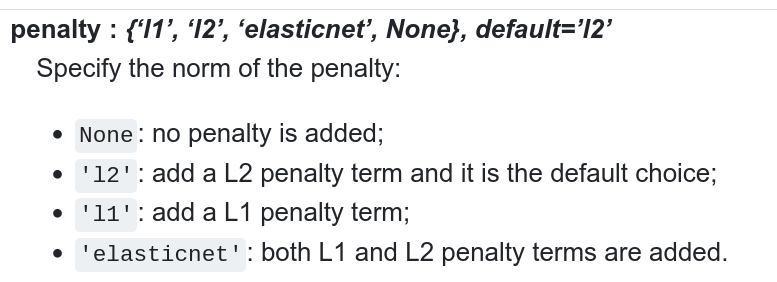

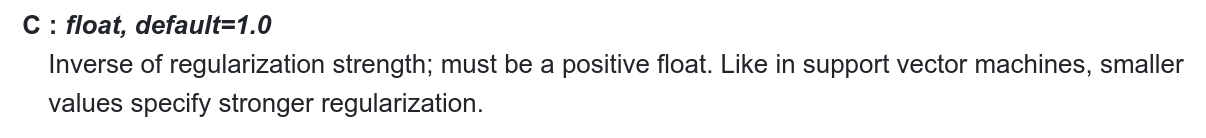

In [13]:
#===========================Fill This===========================#
# 1. Set the options for the `penalty` parameter (Use: 'l1' and 'l2').
# 2. Set the options for the `C` parameter (~25 values, According to computer speed).
lPenalty    = ['l1', 'l2']
lC          = np.linspace(0.001, 10, 2)
#===============================================================#

In [14]:
# Creating the Data Frame

#===========================Fill This===========================#
# 1. Calculate the number of combinations.
# 2. Create a nested loop to create the combinations between the parameters.
# 3. Store the combinations as the columns of a data frame.

# For Advanced Python users: Use iteration tools for create the cartesian product
numComb = len(lPenalty) * len(lC)
print(f'The number of combinations: {numComb}'  )

dData   = {'Penalty': [], 'C': [], 'ROC AUC Train': [0.0] * numComb, 'ROC AUC Test': [0.0] * numComb}

for ii, paramPenalty in enumerate(lPenalty):
    for jj, paramC in enumerate(lC):
        dData['Penalty'].append(paramPenalty)
        dData['C'].append(paramC)
#===============================================================#

dfModelScore = pd.DataFrame(data = dData)
dfModelScore



The number of combinations: 4


,Penalty,C,ROC AUC Train,ROC AUC Test
0,l1,0.001,0.0,0.0
1,l1,10.000,0.0,0.0
2,l2,0.001,0.0,0.0
3,l2,10.000,0.0,0.0


### pythonic way to build model store dataframe using itertools


In [15]:
from itertools import product
# Create cartesian product of hyperparameters
hyperparameter_combinations = list(product(lPenalty, lC))

# Create a DataFrame to hold the regression results
dfModelScore2 = pd.DataFrame({
    'Penalty': [combo[0] for combo in hyperparameter_combinations],
    'C': [combo[1] for combo in hyperparameter_combinations],
    'ROC AUC Train': [0.0] * len(hyperparameter_combinations),
    'ROC AUC Test': [0.0] * len(hyperparameter_combinations)
})


dfModelScore2

,Penalty,C,ROC AUC Train,ROC AUC Test
0,l1,0.001,0.0,0.0
1,l1,10.000,0.0,0.0
2,l2,0.001,0.0,0.0
3,l2,10.000,0.0,0.0


In [16]:
# Optimize the Model

#===========================Fill This===========================#
# 1. Iterate over each row of the data frame `dfModelScore`. Each row defines the hyper parameters.
# 2. Construct the model.
# 3. Train it on the Train Data Set.
# 4. Calculate its AUC ROC score on the train set, save it to the `ROC AUC Train`.
# 5. Calculate its AUC ROC score on the test set, save it to the `ROC AUC Test`.
# !! Make sure to chose the `saga` solver as it is the only one supporting all the regularization options.
# !! Set the parameter `tol` to ~5e-3 to ensure convergence in a reasonable time.
# !! Set the parameter `max_iter` to high value (10_000 or so) to make sure convergence of the model.

for ii in range(numComb):
    paramPenalty    = dfModelScore.loc[ii, 'Penalty']
    paramC          = dfModelScore.loc[ii, 'C']

    if paramPenalty == 'None':
        paramPenalty = None

    print(f'Processing model {ii + 1:03d} out of {numComb} with `penalty` = {paramPenalty} and `C` = {paramC}.')

    oLogRegCls = LogisticRegression(penalty = paramPenalty, tol = 5e-3, C = paramC, solver = 'saga', max_iter = 10_000)
    oLogRegCls = oLogRegCls.fit(mXTrain, vYTrain)

    dfModelScore.loc[ii, 'ROC AUC Train']   = roc_auc_score(vYTrain, oLogRegCls.predict_proba(mXTrain), multi_class = 'ovr')
    dfModelScore.loc[ii, 'ROC AUC Test']    = roc_auc_score(vYTest, oLogRegCls.predict_proba(mXTest), multi_class = 'ovr')
#===============================================================#

Processing model 001 out of 4 with `penalty` = l1 and `C` = 0.001.
Processing model 002 out of 4 with `penalty` = l1 and `C` = 10.0.
Processing model 003 out of 4 with `penalty` = l2 and `C` = 0.001.
Processing model 004 out of 4 with `penalty` = l2 and `C` = 10.0.


* <font color='brown'>(**#**)</font> If one watches the timing of iterations above, he will see that higher regularization (Smaller `C`) will also be faster to calculate as the weights are less "crazy".

In [17]:
# Display the Results
# Display the results sorted (Test).
# Pandas allows sorting data by any column using the `sort_values()` method.
# The `head()` allows us to see only the the first values.
dfModelScore.sort_values(by = ['ROC AUC Test'], ascending = False).head(10)

,Penalty,C,ROC AUC Train,ROC AUC Test
1,l1,10.000,1.000000,0.986643
3,l2,10.000,1.000000,0.986450
2,l2,0.001,0.972612,0.969673
0,l1,0.001,0.500000,0.500000


In [18]:
# Display the Results
# Display the results sorted (Train).
dfModelScore.sort_values(by = ['ROC AUC Train'], ascending = False).head(10)

,Penalty,C,ROC AUC Train,ROC AUC Test
1,l1,10.000,1.000000,0.986643
3,l2,10.000,1.000000,0.986450
2,l2,0.001,0.972612,0.969673
0,l1,0.001,0.500000,0.500000


* <font color='red'>(**?**)</font> Can you see cases of Under / Over Fit?

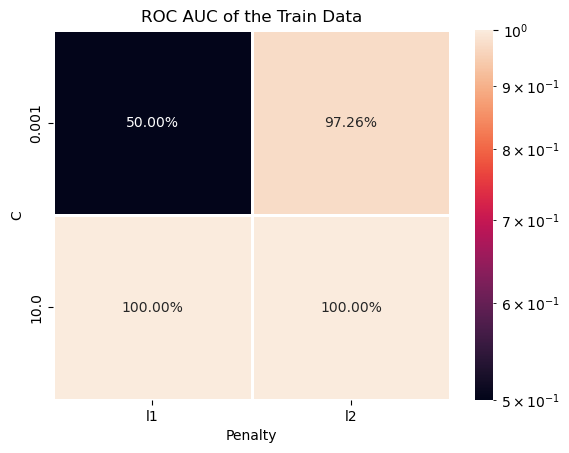

In [19]:
# Train Data ROC AUC Heatmap
# Plotting the Train Data ROC AUC as a Heat Map.
# We can pivot the data set created to have a 2D matrix of the ROC AUC as a function of `C` and the `Penalty`.

hA = sns.heatmap(data = dfModelScore.pivot(index = 'C', columns = 'Penalty', values = 'ROC AUC Train'), robust = True, linewidths = 1, annot = True, fmt = '0.2%', norm = LogNorm())
hA.set_title('ROC AUC of the Train Data')
plt.show()

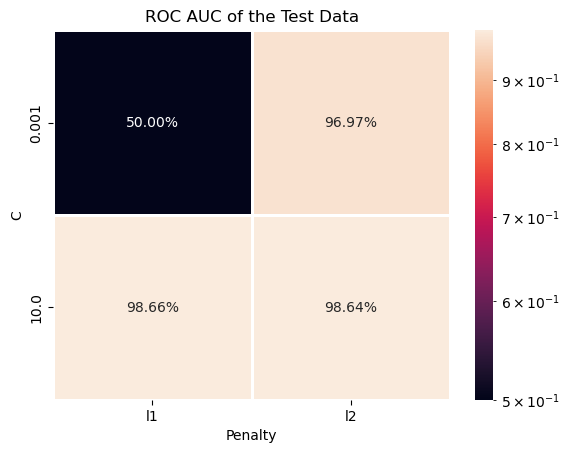

In [20]:
# Test Data ROC AUC Heatmap
# Plotting the Test Data ROC AUC as a Heat Map.
# We can pivot the data set created to have a 2D matrix of the ROC AUC as a function of `C` and the `Penalty`.

hA = sns.heatmap(data = dfModelScore.pivot(index = 'C', columns = 'Penalty', values = 'ROC AUC Test'), robust = True, linewidths = 1, annot = True, fmt = '0.2%', norm = LogNorm())
hA.set_title('ROC AUC of the Test Data')
plt.show()

In [21]:
# Extract the Optimal Hyper Parameters

#===========================Fill This===========================#
# 1. Extract the index of row of the maximum value of `ROC AUC Test`.
# 2. Use the index of the row to extract the hyper parameters which were optimized.
# !! You may find the `idxmax()` method of a Pandas data frame useful.

idxArgMax = dfModelScore['ROC AUC Test'].idxmax()
#===============================================================#

optimalPenalty  = dfModelScore.loc[idxArgMax, 'Penalty']
optimalC        = dfModelScore.loc[idxArgMax, 'C']

print(f'The optimal hyper parameters are: `penalty` = {optimalPenalty}, `C` = {optimalC}')



The optimal hyper parameters are: `penalty` = l1, `C` = 10.0


### Optimal Model

In this section we'll extract the best model an retrain it on the whole data (`mX`).  
We need to export the model which has the best Test values.

In [22]:
# Construct the Optimal Model & Train on the Whole Data

#===========================Fill This===========================#
# 1. Construct the logistic regression model. Use the same `tol`, `solver` and `max_itr` as above.
# 2. Fit the model on the whole data set (mX).
oLogRegCls = LogisticRegression(penalty = optimalPenalty, tol = 5e-3, C = optimalC, solver = 'saga', max_iter = 10_000)
oLogRegCls = oLogRegCls.fit(mX, vY)
#===============================================================#

In [23]:
# Model Score (Accuracy)

print(f'The model score (Accuracy) is: {oLogRegCls.score(mX, vY):0.2%}.')

The model score (Accuracy) is: 93.84%.


* <font color='red'>(**?**)</font> Does it match the results above? Why?

## Explain / Interpret the Model

Linear models, which works mostly on correlation, are relatively easy to interpret / explain.  
In this section we'll show how to interpret the weights of the classifier.

In [24]:
# Extract the Weights of the Classes

#===========================Fill This===========================#
# 1. Extract the weights of the model using the `coef_` attribute.
mW = oLogRegCls.coef_ #<! The model weights (Without the biases)
#===============================================================#

print(f'The coefficients / weights matrix has the dimensions: {mW.shape}')

The coefficients / weights matrix has the dimensions: (10, 784)


Since the weights basically match each pixel of the input image (As a vector) then we can display them as an image.

In [26]:
# Plot the Weights as Images

#===========================Fill This===========================#
# 1. Convert the weights into the form of an image.
# 2. Plot it using `imshow()` of Matplotlib.
# !! You may use `PlotMnistImages()` to do this for you, look at its code.

hF = PlotMnistImages(mW, range(10), numRows = 2, numCols = 5, randomChoice = False)
#===============================================================#

TypeError: PlotMnistImages() got an unexpected keyword argument 'numRows'

* <font color='red'>(**?**)</font> Could you explain the results and how the model works?
* <font color='brown'>(**#**)</font> Usually, for linear models, it is important to have zero mean features.
* <font color='blue'>(**!**)</font> Run the above using the `StandardScaler()` as part of the pipeline (Don't alter the images themselves!)